### فراخوانی داه

In [1]:
import pandas as pd

main_data = pd.read_csv("D:/venv1/final_pre_last_hamed.csv")

### فراخوانی کتابخانه های مورد نیاز

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### برداشتن محدودیت نمایش ستون ها

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [4]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685998 entries, 0 to 685997
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   cat3_slug                  685998 non-null  object 
 1   city_slug                  685998 non-null  object 
 2   neighborhood_slug          685998 non-null  object 
 3   land_size                  685998 non-null  float64
 4   building_size              685998 non-null  float64
 5   deed_type                  685998 non-null  object 
 6   has_business_deed          685998 non-null  bool   
 7   floor                      460312 non-null  object 
 8   rooms_count                640469 non-null  object 
 9   construction_year          640473 non-null  float64
 10  is_rebuilt                 685998 non-null  bool   
 11  location_latitude          467904 non-null  float64
 12  location_longitude         467904 non-null  float64
 13  location_latitude_filled   68

### حذف سطرهای خالی

In [5]:
df = main_data.copy()

In [6]:
df = df.dropna(subset=['adjusted_price_value', 'location_latitude_filled', 'location_longitude_filled'])
print(f"Remaining rows after filtering: {df.shape[0]}")


Remaining rows after filtering: 685997


In [7]:
# تغییر نام برای درک بهتر و قاطی نکردن
df.rename(columns={'lat': 'lat_city', 'long': 'long_city'}, inplace=True)

In [8]:
df.columns

Index(['cat3_slug', 'city_slug', 'neighborhood_slug', 'land_size',
       'building_size', 'deed_type', 'has_business_deed', 'floor',
       'rooms_count', 'construction_year', 'is_rebuilt', 'location_latitude',
       'location_longitude', 'location_latitude_filled',
       'location_longitude_filled', 'big_city', 'luxury', 'basic',
       'extra_features', 'lat_city', 'long_city', 'easting', 'northing',
       'zone_number', 'zone_letter', 'adjusted_price_value'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 685997 entries, 0 to 685997
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   cat3_slug                  685997 non-null  object 
 1   city_slug                  685997 non-null  object 
 2   neighborhood_slug          685997 non-null  object 
 3   land_size                  685997 non-null  float64
 4   building_size              685997 non-null  float64
 5   deed_type                  685997 non-null  object 
 6   has_business_deed          685997 non-null  bool   
 7   floor                      460312 non-null  object 
 8   rooms_count                640468 non-null  object 
 9   construction_year          640472 non-null  float64
 10  is_rebuilt                 685997 non-null  bool   
 11  location_latitude          467904 non-null  float64
 12  location_longitude         467904 non-null  float64
 13  location_latitude_filled   685997 

In [10]:
#df = df.dropna(subset=['construction_year'])

In [11]:
#df['construction_year'] = df['construction_year'].astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 685997 entries, 0 to 685997
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   cat3_slug                  685997 non-null  object 
 1   city_slug                  685997 non-null  object 
 2   neighborhood_slug          685997 non-null  object 
 3   land_size                  685997 non-null  float64
 4   building_size              685997 non-null  float64
 5   deed_type                  685997 non-null  object 
 6   has_business_deed          685997 non-null  bool   
 7   floor                      460312 non-null  object 
 8   rooms_count                640468 non-null  object 
 9   construction_year          640472 non-null  float64
 10  is_rebuilt                 685997 non-null  bool   
 11  location_latitude          467904 non-null  float64
 12  location_longitude         467904 non-null  float64
 13  location_latitude_filled   685997 

### استفاده از دسته تکرار داده های متنی به جای اسم آنها برای عددی سازی ستون

In [13]:
freq_encoding = df['cat3_slug'].value_counts()
df['cat3_slug_freq'] = df['cat3_slug'].map(freq_encoding)

cat3_counts = df['cat3_slug'].value_counts()

df_counts = cat3_counts.reset_index()
df_counts.columns = ['category', 'count']
df_counts

,category,count
0,apartment-sell,268633
1,apartment-rent,174922
2,house-villa-sell,78800
3,house-villa-rent,53566
4,plot-old,45430
5,shop-rent,32088
6,office-rent,13596
7,shop-sell,12389
8,office-sell,3163
9,industry-agriculture-business-rent,2396


In [14]:
freq_encoding = df['neighborhood_slug'].value_counts()
df['neighborhood_slug_n'] = df['neighborhood_slug'].map(freq_encoding)

neighborhood_counts = df['neighborhood_slug'].value_counts()

df_counts = neighborhood_counts.reset_index()
df_counts.columns = ['category', 'count']
df_counts

,category,count
0,unknown,33653
1,andisheh-new-town,19633
2,pardis-city,10360
3,urmia,9253
4,parand-city,8977
...,...,...
1577,nime-shaban,1
1578,bahonar-rasht,1
1579,kuy-azadi,1
1580,jamaran-rasht,1


In [15]:
freq_encoding = df['city_slug'].value_counts()
df['city_slug_n'] = df['city_slug'].map(freq_encoding)

city_counts = df['city_slug'].value_counts()

df_counts = city_counts.reset_index()
df_counts.columns = ['category', 'count']
df_counts


,category,count
0,tehran,119501
1,mashhad,54256
2,karaj,39827
3,isfahan,26372
4,shiraz,25085
...,...,...
412,dozin,2
413,zahak,1
414,maraveh-tapeh,1
415,anbaralum,1


### حذف ستون های اضافی

In [16]:
df = df.drop(['city_slug','neighborhood_slug','rooms_count','floor','deed_type','cat3_slug','has_business_deed', 'construction_year','location_latitude','location_longitude'],axis=1)

In [17]:
df = df.drop(['long_city','lat_city', 'big_city'],axis=1)

In [18]:
df.columns

Index(['land_size', 'building_size', 'is_rebuilt', 'location_latitude_filled',
       'location_longitude_filled', 'luxury', 'basic', 'extra_features',
       'easting', 'northing', 'zone_number', 'zone_letter',
       'adjusted_price_value', 'cat3_slug_freq', 'neighborhood_slug_n',
       'city_slug_n'],
      dtype='object')

In [19]:
df = df.drop(['is_rebuilt'],axis=1)

In [20]:
df = df.drop(['zone_letter'],axis=1)
df = df.drop(['zone_number','northing','easting'],axis=1)

### اسکیل کردن 

In [21]:
df_scal = df.copy()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 685997 entries, 0 to 685997
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   land_size                  685997 non-null  float64
 1   building_size              685997 non-null  float64
 2   location_latitude_filled   685997 non-null  float64
 3   location_longitude_filled  685997 non-null  float64
 4   luxury                     685997 non-null  int64  
 5   basic                      685997 non-null  int64  
 6   extra_features             685997 non-null  int64  
 7   adjusted_price_value       685997 non-null  float64
 8   cat3_slug_freq             685997 non-null  int64  
 9   neighborhood_slug_n        685997 non-null  int64  
 10  city_slug_n                685997 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 62.8 MB


In [23]:

scaler = StandardScaler()

try:
    X_scaled = scaler.fit_transform(df)
except ValueError as e:
    print("Error during scaling:", e)
    raise


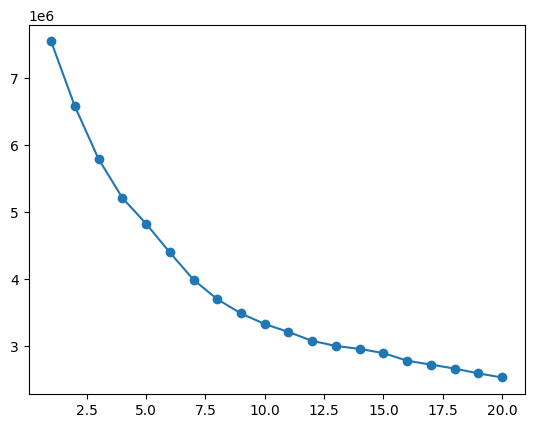

In [24]:
points = []
for k in range(1, 21):
    kmeans = KMeans(k, random_state=23)
    kmeans.fit(X_scaled)
    points.append(kmeans.inertia_)
plt.plot(range(1, 21), points, marker='o')
plt.show()

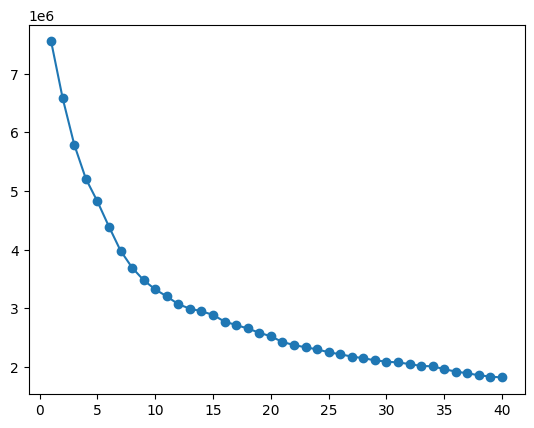

In [25]:
points = []
for k in range(1, 41):
    kmeans = KMeans(k, random_state=23)
    kmeans.fit(X_scaled)
    points.append(kmeans.inertia_)
plt.plot(range(1, 41), points, marker='o')
plt.show()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 685997 entries, 0 to 685997
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   land_size                  685997 non-null  float64
 1   building_size              685997 non-null  float64
 2   location_latitude_filled   685997 non-null  float64
 3   location_longitude_filled  685997 non-null  float64
 4   luxury                     685997 non-null  int64  
 5   basic                      685997 non-null  int64  
 6   extra_features             685997 non-null  int64  
 7   adjusted_price_value       685997 non-null  float64
 8   cat3_slug_freq             685997 non-null  int64  
 9   neighborhood_slug_n        685997 non-null  int64  
 10  city_slug_n                685997 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 62.8 MB


### مدل سازی و آموزش

In [44]:
k = 12
kmeans = KMeans(n_clusters=k, random_state=23)
df['cluster'] = kmeans.fit_predict(X_scaled)

### نمایش

In [45]:
centroids_latlon = df.groupby('cluster')[['location_latitude_filled', 'location_longitude_filled']].mean().reset_index()

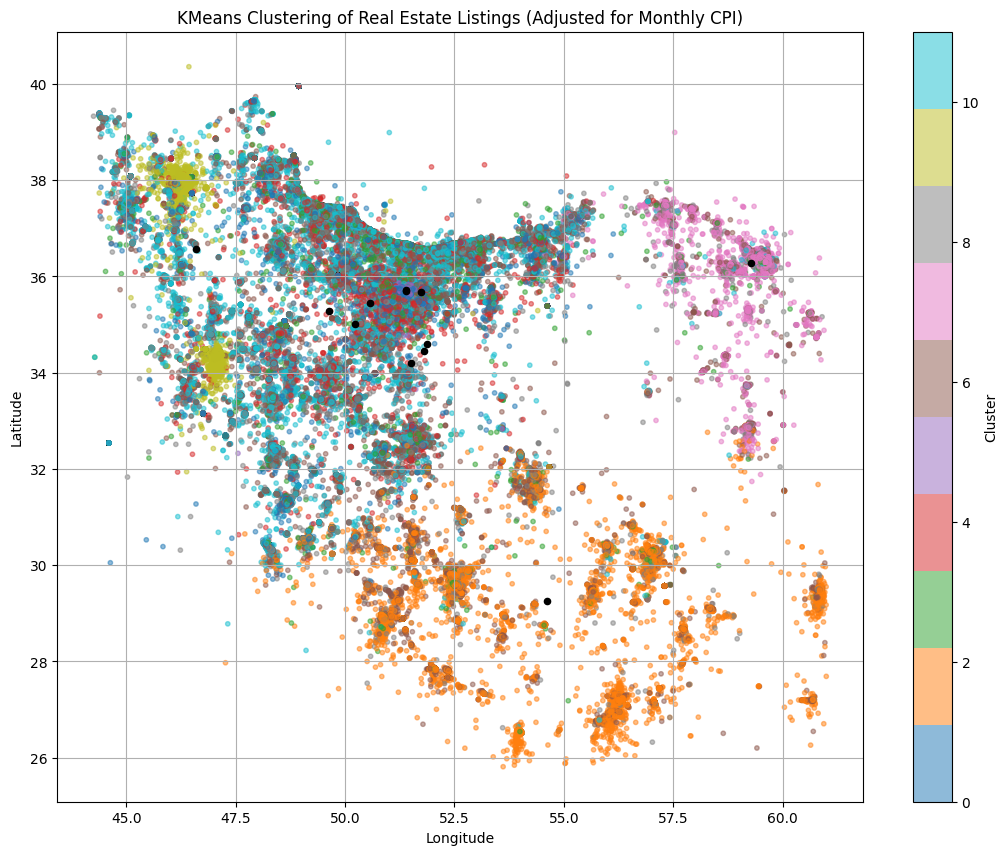

In [46]:
df_scall=df[df['cluster'].notna()]
plt.figure(figsize=(13, 10))
scatter = plt.scatter( (df_scall['location_longitude_filled']),(df_scall['location_latitude_filled']), c=df_scall['cluster'], cmap='tab10', alpha=0.5, s=10)
plt.scatter(centroids_latlon['location_longitude_filled'], centroids_latlon['location_latitude_filled'],
            c='black', s=20, marker='o', label='Centers')
plt.colorbar(scatter, label='Cluster')

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("KMeans Clustering of Real Estate Listings (Adjusted for Monthly CPI)")
plt.grid(True)
plt.show()

### اطلاعات جهت تحلیل هر دسته

In [47]:
df.groupby('cluster').describe()

land_size                                                            \
            count        mean        std        min         25%         50%   
cluster                                                                       
0         71340.0  142.881072  35.785588  25.000000  116.666667  141.666667   
1         63884.0  103.055778  27.993026  25.000000   83.333333  100.000000   
2         56091.0  171.201250  54.035827  25.000000  133.333333  166.666667   
3         56733.0  250.987262  50.646190  64.000000  216.666667  250.000000   
4        104639.0  139.041384  35.059333  25.000000  116.666667  138.333333   
5         46294.0  157.436889  38.285351  25.000000  131.666667  153.333333   
6         43152.0  316.136440  52.770539  80.000000  275.000000  333.333333   
7         53619.0  155.614216  49.231101  25.000000  125.000000  150.000000   
8         62265.0   68.782189  33.026710  25.000000   41.666667   61.666667   
9         33588.0  160.416816  76.587017  25.000000  106.666667  150.000000   
10        66985.0  160.864945  56.101183  25.000000  120.000000  160.000000   
11        27407.0  206.169750  77.876322  33.333333  145.000000  196.666667   

                           building_size                                      \
                75%    max         count        mean        std   min    25%   
cluster                                                                        
0        166.666667  310.0       71340.0   85.725568  21.473002  13.0   70.0   
1        116.666667  400.0       63884.0   62.182503  16.452939  10.0   50.0   
2        200.000000  480.0       56091.0  108.975807  33.417734  10.0   85.0   
3        280.000000  495.0       56733.0  154.890575  30.157115  30.0  133.0   
4        163.333333  330.0      104639.0   83.710137  20.681679  10.0   70.0   
5        183.333333  440.0       46294.0   95.283687  23.309383  15.0   80.0   
6        348.333333  495.0       43152.0  187.339892  31.428735  10.0  164.0   
7        183.333333  480.0       53619.0   97.754975  28.850906  10.0   78.0   
8         90.000000  300.0       62265.0   45.805766  22.187120  10.0   25.0   
9        208.333333  485.0       33588.0  102.610903  45.831908  10.0   70.0   
10       200.000000  455.0       66985.0  111.248459  31.069941  10.0   90.0   
11       250.000000  495.0       27407.0  114.897836  41.296581  10.0   85.0   

                             location_latitude_filled                       \
           50%    75%    max                    count       mean       std   
cluster                                                                      
0         85.0  100.0  186.0                  71340.0  35.013424  1.905346   
1         60.0   70.0  210.0                  63884.0  35.691313  0.073417   
2        105.0  130.0  242.0                  56091.0  29.256988  1.328632   
3        150.0  170.0  242.0                  56733.0  34.606107  2.424014   
4         84.0   99.0  172.0                 104639.0  35.458032  1.378235   
5         92.0  110.0  240.0                  46294.0  35.718660  0.092991   
6        200.0  203.0  242.0                  43152.0  34.205290  2.860490   
7         95.0  115.0  240.0                  53619.0  36.280566  0.631030   
8         45.0   60.0  140.0                  62265.0  34.461468  2.466489   
9         95.0  130.0  242.0                  33588.0  36.576167  1.803734   
10       105.0  130.0  241.0                  66985.0  35.274328  2.013250   
11       105.0  140.0  242.0                  27407.0  35.670229  1.736584   

                                                                \
               min        25%        50%        75%        max   
cluster                                                          
0        29.581809  33.905932  35.677120  35.875500  39.954967   
1        29.592031  35.673805  35.689252  35.716492  38.237648   
2        25.813490  28.891617  29.572979  29.749347  33.625889   
3        26.528797  32.670788  35.726498  36.297494  3